# Índice

1. [Exploración inicial y preparación de los datos](#1.-Exploración-inicial-y-preparación-de-los-datos)

    1.1. [Datos sobre la generación de energía en España](#.1.1.-Datos-sobre-la-generación-de-energía-en-España)

2. [Análisis univariante](#)
3. [Análisis bivariante](#)


## 1. Exploración inicial y preparación de los datos

In [460]:
#Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import visualizacion_analisis as viz

In [461]:
#Creamos los DataFrames
df_energia = pd.read_csv("./data/estructura_generacion.csv")

Visualizamos los datos sobre la estructura de generación de la energía

In [462]:
df_energia.head()

,Fecha,Hidraulica,Turbinacion bombeo,Nuclear,Carbon,Motores diesel,Turbina de gas,Turbina de vapor,Ciclo combinado,Eolica,Solar fotovoltaica,Solar termica,Otras renovables,Cogeneracion,Residuos no renovables,Residuos renovables,Generacion total
0,01/01/2011,132.922642,3.096794,156.043256,63.539183,9.421646,0.635928,6.335737,142.852659,30.530962,6.383971,0.689682,9.422600,60.034044,3.476619,2.075125,627.460848
1,02/01/2011,122.475160,5.812876,155.946404,63.250905,9.583460,0.760919,7.312269,105.985984,120.932782,9.681929,0.906356,9.735174,67.987652,3.541864,1.974489,685.888223
2,03/01/2011,146.861638,3.855045,155.911784,99.351269,10.031223,1.936269,8.551252,220.507008,77.934616,12.336110,0.635974,9.724737,89.705195,3.601894,1.996498,842.940512
3,04/01/2011,145.876053,8.182844,156.264172,115.105686,10.024313,2.079062,8.355284,203.996354,104.022723,8.502068,0.965016,9.832040,93.111247,3.409972,1.783813,871.510647
4,05/01/2011,158.946134,5.497872,156.313258,71.928723,10.067259,1.454871,8.234295,111.598224,200.221686,7.503855,0.888609,10.526449,90.420805,3.482283,1.746282,838.830605


In [463]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha                   4717 non-null   object 
 1   Hidraulica              4717 non-null   float64
 2   Turbinacion bombeo      4717 non-null   float64
 3   Nuclear                 4717 non-null   float64
 4   Carbon                  4717 non-null   float64
 5   Motores diesel          4717 non-null   float64
 6   Turbina de gas          4717 non-null   float64
 7   Turbina de vapor        4717 non-null   float64
 8   Ciclo combinado         4717 non-null   float64
 9   Eolica                  4717 non-null   float64
 10  Solar fotovoltaica      4717 non-null   float64
 11  Solar termica           4717 non-null   float64
 12  Otras renovables        4717 non-null   float64
 13  Cogeneracion            4717 non-null   float64
 14  Residuos no renovables  4717 non-null   

No hay valores nulos. Convertimos el tipo de la columna "Fecha" al formato adecuado

In [464]:
df_energia["Fecha"] = pd.to_datetime(df_energia["Fecha"], format='%d/%m/%Y')

### 1.1. Datos sobre la generación de energía en España

Modificamos la estructura del DataFrame para el análisis

In [465]:
#Eliminamos la columna de generación total
df_energia.drop(columns="Generacion total", inplace=True)

#Ponemos los valores de cada columna por filas
columnas_melt = [columna for columna in df_energia.columns if "Fecha" != columna]
df_energia = pd.melt(df_energia, id_vars=["Fecha"], value_vars=columnas_melt)

#Renombramos la columna con los valores
df_energia.rename(columns={"variable":"tipo_generacion","value":"energia_generada"},inplace=True)

df_energia.head()

,Fecha,tipo_generacion,energia_generada
0,2011-01-01,Hidraulica,132.922642
1,2011-01-02,Hidraulica,122.475160
2,2011-01-03,Hidraulica,146.861638
3,2011-01-04,Hidraulica,145.876053
4,2011-01-05,Hidraulica,158.946134


In [466]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70755 entries, 0 to 70754
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             70755 non-null  datetime64[ns]
 1   tipo_generacion   70755 non-null  object        
 2   energia_generada  70755 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.6+ MB


Continuamos agrupando la generación de energía en 3 grupos, según el origen de la energía, para el análisis del mix energético:
* Energía generada a partir de fuentes renovables
* Energía generada a partir de combustibles fósiles
* Energía generada por reacciones nucleares

In [467]:
#Definimos la función para la clasificación
def clasificador_energia(valor):
    
    if valor == "Hidraulica":
        return "Renovable"
    
    elif valor == "Turbinacion bombeo":
        return "Renovable"
    
    elif valor == "Nuclear":
        return  "Nuclear"
    
    elif valor == "Carbon":
        return "Fosil"
    
    elif valor == "Motores diesel":
        return "Fosil"
    
    elif valor == "Turbina de gas":
        return "Fosil"
    
    elif valor == "Turbina de vapor":
        return "Fosil"  
    
    elif valor == "Ciclo combinado":
        return "Fosil" 
    
    elif valor == "Eolica":
        return "Renovable"
    
    elif valor == "Solar fotovoltaica":
        return "Renovable"

    elif valor == "Solar termica":
        return "Renovable"
    
    elif valor == "Otras renovables":
        return "Renovable"
    
    elif valor == "Cogeneracion":
        return "Fosil"
    
    elif valor == "Residuos no renovables":
        return "Fosil"
    
    elif valor == "Residuos renovables":
        return "Renovable"
    
    else:
        return "error"

#Creamos una columna con la clasificación
df_energia["origen_energia"] = df_energia["tipo_generacion"].apply(clasificador_energia)

Creamos una columna con la clasificación de la energía según si emite de CO2

In [468]:
#Definimos la función para la clasificación
def clasificador_emision(valor):
    
    if valor == "Hidraulica":
        return "No"
    
    elif valor == "Turbinacion bombeo":
        return "No"
    
    elif valor == "Nuclear":
        return  "No"
    
    elif valor == "Carbon":
        return "Si"
    
    elif valor == "Motores diesel":
        return "Si"
    
    elif valor == "Turbina de gas":
        return "Si"
    
    elif valor == "Turbina de vapor":
        return "Si"  
    
    elif valor == "Ciclo combinado":
        return "Si" 
    
    elif valor == "Eolica":
        return "No"
    
    elif valor == "Solar fotovoltaica":
        return "No"

    elif valor == "Solar termica":
        return "No"
    
    elif valor == "Otras renovables":
        return "No"
    
    elif valor == "Cogeneracion":
        return "Si"
    
    elif valor == "Residuos no renovables":
        return "Si"
    
    elif valor == "Residuos renovables":
        return "No"
    
    else:
        return "error"

#Creamos una columna con la clasificación
df_energia["emision_CO2"] = df_energia["tipo_generacion"].apply(clasificador_emision)

Incluimos una columna con el año

In [469]:
df_energia["año"] = df_energia["Fecha"].dt.year

In [470]:
#df_energia["energia_renovable"] = df_energia["Hidraulica"] + df_energia["Turbinacion bombeo"] + df_energia["Eolica"] + df_energia["Solar fotovoltaica"] + df_energia["Solar termica"] + df_energia["Otras renovables"] + df_energia["Residuos renovables"]
                                
#df_energia["energia_fosil"] = df_energia["Carbon"] + df_energia["Motores diesel"] + df_energia["Turbina de gas"] + df_energia["Turbina de vapor"] + df_energia["Ciclo combinado"] + df_energia["Cogeneracion"] + df_energia["Residuos no renovables"]

#df_energia["energia_nuclear"] = df_energia["Nuclear"] 


Mostramos el contenido final del DataFrame

In [471]:
df_energia.head()

,Fecha,tipo_generacion,energia_generada,origen_energia,emision_CO2,año
0,2011-01-01,Hidraulica,132.922642,Renovable,No,2011
1,2011-01-02,Hidraulica,122.475160,Renovable,No,2011
2,2011-01-03,Hidraulica,146.861638,Renovable,No,2011
3,2011-01-04,Hidraulica,145.876053,Renovable,No,2011
4,2011-01-05,Hidraulica,158.946134,Renovable,No,2011


In [472]:
df_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70755 entries, 0 to 70754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             70755 non-null  datetime64[ns]
 1   tipo_generacion   70755 non-null  object        
 2   energia_generada  70755 non-null  float64       
 3   origen_energia    70755 non-null  object        
 4   emision_CO2       70755 non-null  object        
 5   año               70755 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 3.0+ MB


## 2. Análisis univariante

Comenzamos el análisis para el DataFrame de energía generada realizando la clasificación de las variables

| Columna/Variable  | Descripción                         | Tipo de variable  | Importancia inicial  | Notas |
|-------------------|-------------------------------------|-------------------|----------------------|-------|
| Fecha             | Fecha de generación                 | Fecha             | 2                    |       |
| tipo_generacion   | Método de generación de la energía  | Categórica        | 0                    |       |
| energia_generada  | Generación de energía diaria en GWh | Numérica continua | 1                    |       |
| origen_energia    | Origen de la fuente de energía      | Categórica        | 1                    |       |
| emision_CO2       | Indica si tiene emisión de CO2      | Categórica        | 2                    |       |
| año               | Año de generación                   | Numérica discreta | 2                    |       |

In [473]:
#Definimos una funcion para obtener la principales medidas de tendencia central
def medidas_tendencia_central(df,lista_columnas):
    df_medidas = df.describe()[lista_columnas]
    df_medidas = df_medidas.T
    df_medidas = df_medidas.drop(columns=["count"])
    
    #Incluimos el coeficiente de variacion
    df_medidas["coeficiente_variacion"] = 0.0
    for variable in df_medidas.index:
        cv = round((df_medidas.loc[variable, "mean"]/df_medidas.loc[variable, "std"])*100,2)
        df_medidas.loc[variable, "coeficiente_variacion"] = cv
    
    return df_medidas

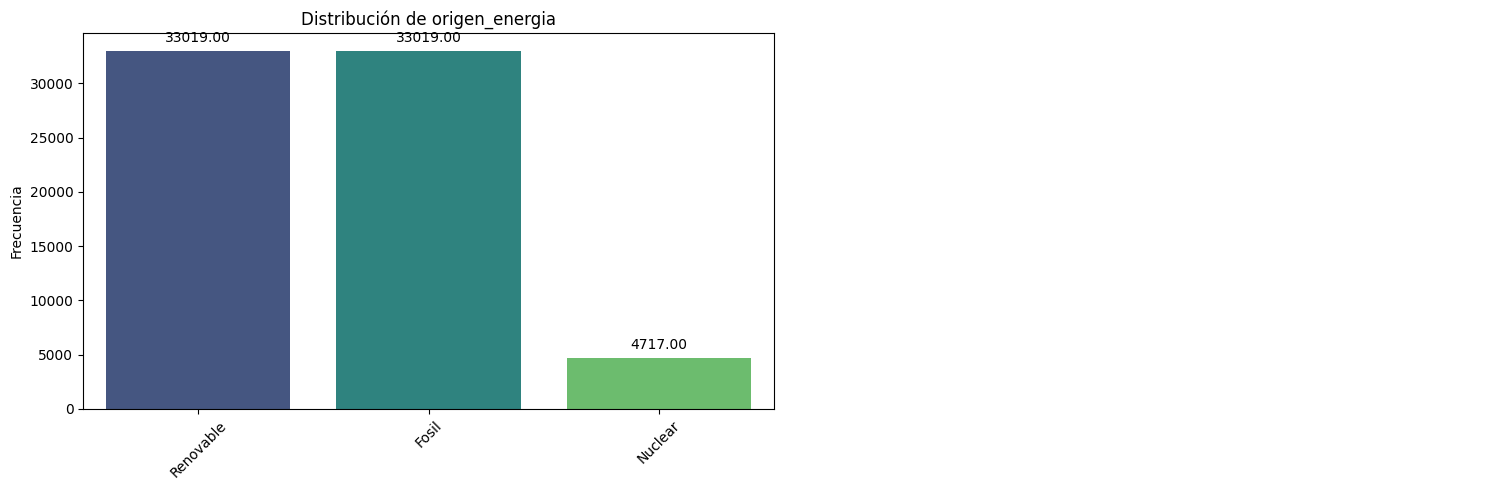

In [482]:
viz.multiples_categoricas(df_energia, ["origen_energia"],relativa=False,mostrar_valores=True)

(2,)


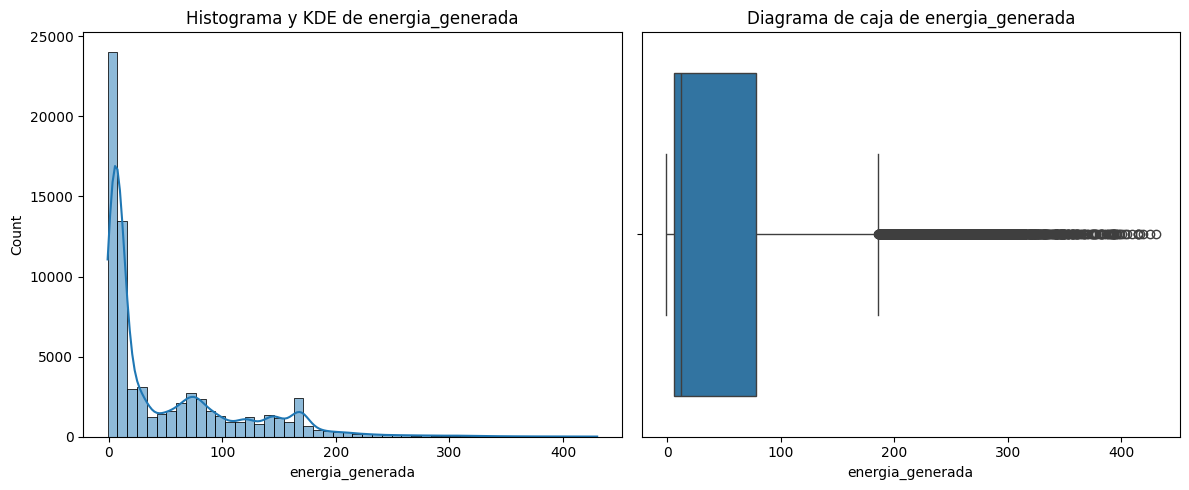

In [475]:
#Visualizamos el histograma, KDE y diagrama de caja
viz.multiples_combinados(df_energia,["energia_generada"], bins=50)

In [433]:
medidas_tendencia_central(df_energia,["energia_generada"])

,mean,min,25%,50%,75%,max,std,coeficiente_variacion
energia_generada,48.724962,-1.038624,5.708258,12.562126,77.867385,430.064376,62.126395,78.43


* Distribución asimétrica con poca agrupación y dispersa. 
* La mediana de generación diaria de energía se situa en torno a los 12.5 GWh
* Hay muchos *outliers* por encima del *maximum*

In [450]:
df_energia.loc[df_energia["energia_generada"]>200,"tipo_energia"].value_counts()

tipo_energia
Renovable    1096
Fosil         632
Name: count, dtype: int64

In [483]:
df_energia.loc[df_energia["energia_generada"]==0]

,Fecha,tipo_generacion,energia_generada,origen_energia,emision_CO2,año
49693,2017-11-28,Solar termica,0.0,Renovable,No,2017
50052,2018-11-22,Solar termica,0.0,Renovable,No,2018
50406,2019-11-11,Solar termica,0.0,Renovable,No,2019
50416,2019-11-21,Solar termica,0.0,Renovable,No,2019


## 3. Análisis multivariante